In [79]:
import matplotlib.pyplot as plt 
import numpy as np 
from astropy.io import fits



In [80]:
file = fits.open('/home/amir/Desktop/PULSARS/Data/J0139-5814_610.fits')

In [81]:
pulsarNAME = file[0].header['SRC_NAME']
pulsarNAME

'J0139+5814'

In [82]:
pulsarFREQUENCY = file['HISTORY'].data['CTR_FREQ'][0]
pulsarFREQUENCY

610.0

In [83]:
data = file['SUBINT'].data

Text(0, 0.5, '$V$')

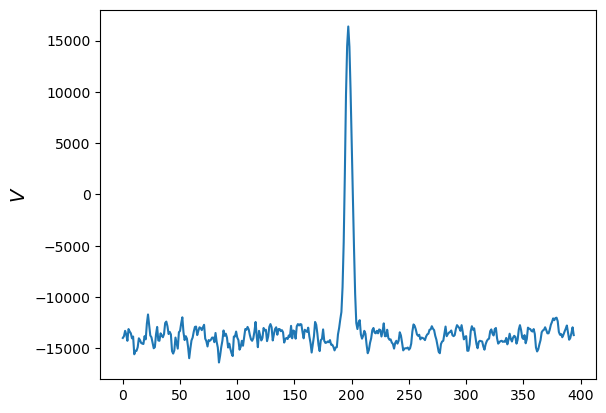

In [85]:
flux_data = data['DATA']
V = flux_data[0, 3, :]
#plt.figure().set_figwidth(100)
plt.plot(V[0])
plt.ylabel('$V$', size=14)

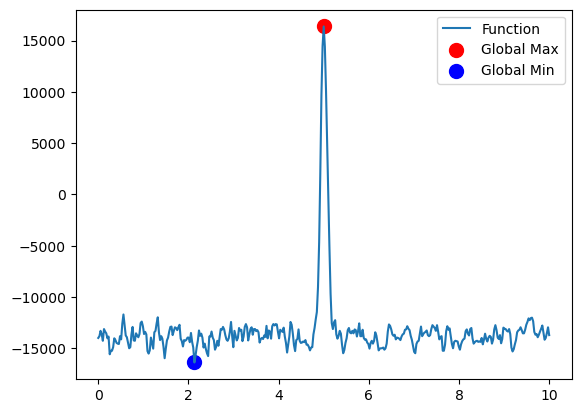

Global maximum at point (5.00, 16383.00)
Global minimum at point (2.13, -16383.00)


In [86]:
def find_extrema(x, y):
    # Finding the index of the global minimum and maximum
    min_index = np.argmin(y)
    max_index = np.argmax(y)

    # Getting the points of the global minimum and maximum
    min_point = (x[min_index], y[min_index])
    max_point = (x[max_index], y[max_index])

    return max_point, min_point




#data
y_data = V[0]
x_data = np.linspace(0, 10, len(y_data))

# Finding the global minimum and maximum
global_max_point, global_min_point = find_extrema(x_data, y_data)

# Plotting the function and marking the global extrema
plt.plot(x_data, y_data, label='Function')
plt.scatter(*global_max_point, color='red', label='Global Max', marker='o', s=100)
plt.scatter(*global_min_point, color='blue', label='Global Min', marker='o', s=100)

# Displaying the plot
plt.legend()
plt.show()

# Printing the results
print(f"Global maximum at point ({global_max_point[0]:.2f}, {global_max_point[1]:.2f})")
print(f"Global minimum at point ({global_min_point[0]:.2f}, {global_min_point[1]:.2f})")


In [87]:
average = np.mean(V[0])
average

-13296.875949367088

In [88]:
a = np.abs(global_max_point[1] - average)
a

29679.875949367088

In [89]:
b = np.abs(global_min_point[1] - average)
b

3086.1240506329123

In [90]:
a/b

9.617201208512745

In [91]:
b/a

0.1039803554400881

In [97]:
def type_pulsar(average, max_point, min_point):
    a = np.abs(max_point - average)
    b = np.abs(min_point -average)

    ratio_one = a / b
    ratio_two = b / a
    if (ratio_one <= 1.2) and (ratio_two >= 0.8):
        classification = 'group 1'
    elif a > b:
        classification = 'group 2'
    elif b < a:
        classification = 'group 3'
    
    return classification
